# **GTSF IC Quant Mentorship**
### **Python for Quantitative Finance Fundamentals**

**Name:** Sachi Goel
**GT Username:** sgoel304
**Due Date:** October 7, 2025  

---

## **Project Overview**

This project will test your understanding of the fundamental concepts covered in our first four weeks: probability/statistics, time value of money, basic portfolio theory, and financial data analysis using Python.

### **What You'll Demonstrate**
- **Data Handling**: Download, clean, and analyze real financial data
- **Statistical Analysis**: Calculate returns, risk metrics, and correlations  
- **Portfolio Basics**: Apply diversification and risk-return concepts
- **Python Skills**: Use pandas, numpy, and matplotlib effectively

---
## **Setup and Libraries**

In [5]:
# You may only use these libraries (same as original project)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import yfinance as yf

# Configuration
pd.set_option('display.max_columns', 10)
pd.set_option('display.precision', 4)
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Environment setup complete!")

✅ Environment setup complete!


---
## **Part 1: Data Collection & Basic Analysis (25 points)**

### **Step 1.1: Download Stock Data**
Download 3 years of data (2021-2024) for these assets and create clean datasets:

**Required Assets:**
- **AAPL** (Apple) - Large tech stock
- **JNJ** (Johnson & Johnson) - Defensive stock  
- **SPY** (S&P 500 ETF) - Market benchmark

In [6]:
def download_stock_data(tickers, start_date, end_date):
    """
    Download adjusted close prices for multiple stocks.
    
    Parameters:
    -----------
    tickers : list
        List of stock symbols
    start_date : str  
        Start date as 'YYYY-MM-DD'
    end_date : str
        End date as 'YYYY-MM-DD'
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with dates as index, stocks as columns
    """
    data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)['Close']
    # remove duplicates
    data = data[~data.index.duplicated(keep='last')]
    # back fill
    data = data.bfill()
    # forward fill
    data = data.ffill()
    return data

# Download the data
tickers = ['AAPL', 'JNJ', 'SPY'] 
prices_df = download_stock_data(tickers, '2021-01-01', '2024-01-01')

# Display first few rows and basic info
print("First 5 rows:")
print(prices_df.head())
print(f"\nDataset shape: {prices_df.shape}")
print(f"Date range: {prices_df.index[0].date()} to {prices_df.index[-1].date()}")

[*********************100%***********************]  3 of 3 completed

First 5 rows:
Ticker          AAPL       JNJ       SPY
Date                                    
2021-01-04  126.0966  136.6397  345.2740
2021-01-05  127.6556  138.2462  347.6520
2021-01-06  123.3585  139.5471  349.7304
2021-01-07  127.5679  140.0186  354.9266
2021-01-08  128.6690  139.7305  356.9488

Dataset shape: (753, 3)
Date range: 2021-01-04 to 2023-12-29


### **Step 1.2: Calculate Returns**
Calculate both simple and log returns as covered in the slides:

In [7]:
def calculate_returns(prices_df):
    """
    Calculate simple and log returns from price data.
    
    Returns:
    --------
    tuple: (simple_returns_df, log_returns_df)
    """
    simpledf = prices_df.pct_change()
    longdf = np.log(prices_df).diff()
    return (simpledf, longdf)

# Calculate returns
simple_returns, log_returns = calculate_returns(prices_df)

print("Simple returns - first 5 rows:")
print(simple_returns.head())

Simple returns - first 5 rows:
Ticker        AAPL     JNJ     SPY
Date                              
2021-01-04     NaN     NaN     NaN
2021-01-05  0.0124  0.0118  0.0069
2021-01-06 -0.0337  0.0094  0.0060
2021-01-07  0.0341  0.0034  0.0149
2021-01-08  0.0086 -0.0021  0.0057


### **Questions - Part 1**
**Answer these questions in the markdown cell below:**

1. How many trading days of data do you have for each stock?
2. What's the difference between the largest simple return and largest log return for AAPL?
3. Why do we typically use adjusted close prices instead of regular close prices?

### **Your Answers - Part 1:**

1. The number of trading days of data for each stock would the number of rows I have in my prices_df dataset. In this case, we have 753 days of data.

2. The largest simple return for APPL is 0.08897490774924677 and the largest log return is 0.08523680213278872 (obtained using simple_returns['AAPL'].max(), log_returns['AAPL'].max() respectively). The difference of these values is 0.08897490774924677 - 0.08523680213278872 = 0.00373810561646.

3. If we just looked at the normal close price, it wouldn't take into account certain corporate actions that affect the stock price, like stock splits or cash dividends which would affect the price of the stock and isn't an accurate representation of the security's true value. Without using the adjusted price, a stock split would appear as a huge, permanent drop in value on a price chart, and calculations of returns would ignore the cash value delivered by dividends, leading to an understatement of total long-term returns.

---
## **Part 2: Risk and Return Analysis (25 points)**

### **Step 2.1: Basic Statistics**
Calculate the key statistics we covered in class:

In [8]:
def calculate_basic_statistics(returns_df):
    """
    Calculate mean, standard deviation, and annualized metrics.
    
    Returns:
    --------
    pandas.DataFrame
        Table with statistics for each stock
    """
    stats_dict = {}
    
    for stock in returns_df.columns:

        ######################
        # YOUR CODE HERE
        # Calculate:
        # - Daily mean return
        # - Daily standard deviation  
        # - Annualized return (daily_mean * 252)
        # - Annualized volatility (daily_std * sqrt(252))
        # - Sharpe ratio (assume 2% risk-free rate)
        ######################
        daily_returns = returns_df[stock]
        daily_mean = daily_returns.mean()
        daily_std = daily_returns.std()
        annual_return = daily_mean * 252
        annual_volatility = daily_std * np.sqrt(252)
        sharpe_ratio = (annual_return - .02) / annual_volatility

        stats_dict[stock] = {
            'Daily Mean Return': daily_mean,
            'Daily Std Dev': daily_std,
            'Annualized Return': annual_return,
            'Annualized Volatility': annual_volatility,
            'Sharpe Ratio': sharpe_ratio
        }

    
    return pd.DataFrame(stats_dict).T

# Calculate and display statistics
stats_table = calculate_basic_statistics(simple_returns)
print("Return and Risk Statistics:")
print(stats_table)

Return and Risk Statistics:
      Daily Mean Return  Daily Std Dev  Annualized Return  \
AAPL             0.0007         0.0175             0.1776   
JNJ              0.0002         0.0102             0.0406   
SPY              0.0005         0.0111             0.1154   

      Annualized Volatility  Sharpe Ratio  
AAPL                 0.2780        0.5668  
JNJ                  0.1619        0.1274  
SPY                  0.1760        0.5422  


### **Step 2.2: Risk-Return Visualization** 
Create the classic risk-return scatter plot from the slides:

/var/folders/5b/9zzp_rgs4690tbp4cmzdk7bc0000gn/T/ipykernel_3429/246205576.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (stats_df['Annualized Volatility'][i] + 0.005, stats_df['Annualized Return'][i]),


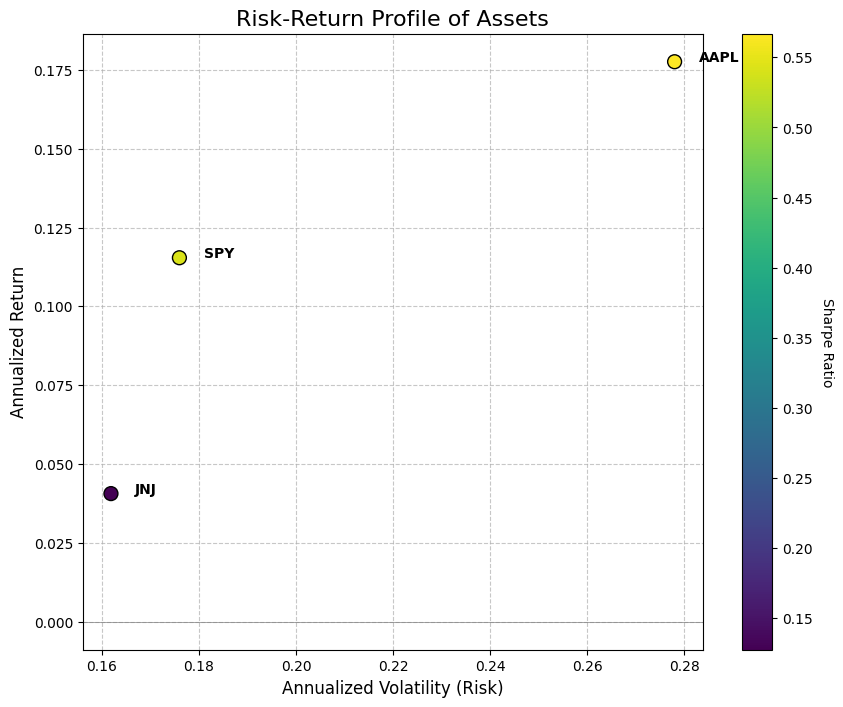

In [9]:
def plot_risk_return(stats_df):
    """
    Create a risk-return scatter plot.
    """
    plt.figure(figsize=(10, 8))
    
    ######################
    # YOUR CODE HERE  
    # Create scatter plot with:
    # - x-axis: Annualized Volatility
    # - y-axis: Annualized Return
    # - Label each point with stock symbol
    # - Add proper title and axis labels
    ######################
    plt.scatter(
        stats_df['Annualized Volatility'], 
        stats_df['Annualized Return'],
        c=stats_df['Sharpe Ratio'],  
        cmap='viridis',              
        s=100,                      
        edgecolors='k'
    )

    for i, txt in enumerate(stats_df.index):
        plt.annotate(
            txt, 
            (stats_df['Annualized Volatility'][i] + 0.005, stats_df['Annualized Return'][i]),
            fontsize=10,
            weight='bold'
        )

    plt.title('Risk-Return Profile of Assets', fontsize=16)
    plt.xlabel('Annualized Volatility (Risk)', fontsize=12)
    plt.ylabel('Annualized Return', fontsize=12)

    cbar = plt.colorbar()
    cbar.set_label('Sharpe Ratio', rotation=270, labelpad=15)

    plt.grid(True, linestyle='--', alpha=0.7)

    plt.axhline(0, color='gray', linestyle='-', linewidth=0.5)
    plt.show()

plot_risk_return(stats_table)

### **Questions - Part 2**

4. Which stock has the highest Sharpe ratio? What does this mean?
5. Does the risk-return relationship match what you'd expect from the slides?
6. How does SPY compare to the individual stocks in terms of risk?

### **Your Answers - Part 2:**

4. The stock with the highest Sharpe ratio was AAPL. A Sharpe ratio compares an investment's return with its risk, since AAPL had a high ratio that means it has a higher excess return as compared to the risk an investor has to take, as compared to the other stocks. AAPL has a more attractive risk-adjusted return.

5. Yes it makes sense. For AAPL it had the highest risk of .2780 annualized volatility and devliered the highest return .1776. Similar with JNJ it had the lowest risk of .1619 and the lowest return of .0406. Since riskier assests provide more opportunity for higher returns, these values make sense.

6. SPY is signifcantly less risky than AAPL, which is expected since SPY is an ETF while AAPL is one stock. However, it appears that SPY is slightly more risky than JNJ (determined by the annualized volatility), but this can also be explained since JNJ is a blue-chip stock with stable earnings.

---
## **Part 3: Correlation and Diversification (25 points)**

### **Step 3.1: Correlation Analysis**
Calculate and analyze correlations as discussed in portfolio theory:

Correlation Matrix:
Ticker    AAPL     JNJ     SPY
Ticker                        
AAPL    1.0000  0.2396  0.8052
JNJ     0.2396  1.0000  0.3548
SPY     0.8052  0.3548  1.0000


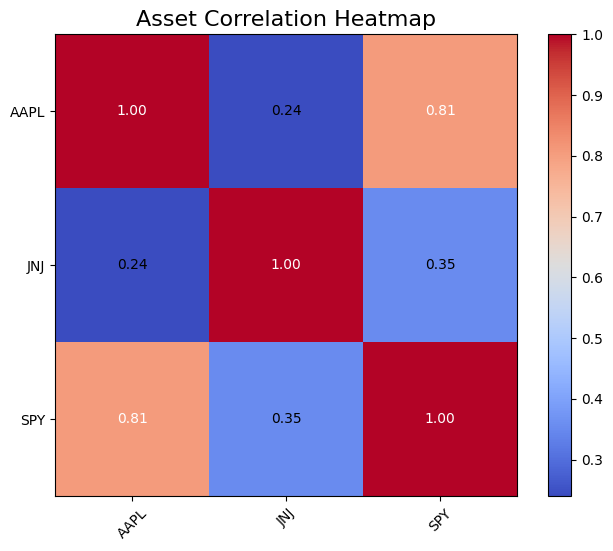

In [10]:
def analyze_correlations(returns_df):
    """
    Calculate correlation matrix and analyze diversification benefits.
    """
    # Calculate correlation matrix
    corr_matrix = returns_df.corr()
    
    print("Correlation Matrix:")
    print(corr_matrix)
    
    # Create correlation heatmap
    plt.figure(figsize=(8, 6))
    ######################
    # YOUR CODE HERE
    # Create a heatmap of the correlation matrix
    # Hint: You can use plt.imshow() with a colormap
    # Add colorbar and proper labels
    ######################

    plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest') 
    plt.colorbar()

    labels = corr_matrix.columns
    n_assets = len(labels)
    plt.xticks(np.arange(n_assets), labels, rotation=45)
    plt.yticks(np.arange(n_assets), labels)

    for i in range(n_assets):
        for j in range(n_assets):
            text = plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                           ha="center", va="center", color="black" if abs(corr_matrix.iloc[i, j]) < 0.8 else "white")
    
    plt.title('Asset Correlation Heatmap', fontsize=16)
    plt.show()
    
    return corr_matrix

correlation_matrix = analyze_correlations(simple_returns)

### **Step 3.2: Portfolio Construction**
Build a simple equal-weighted portfolio and analyze its performance:

In [11]:
def create_equal_weighted_portfolio(returns_df):
    """
    Create an equal-weighted portfolio of AAPL and JNJ.
    (Exclude SPY since it's our benchmark)
    """
    # Create equal-weighted portfolio of individual stocks
    portfolio_returns = returns_df[['AAPL', 'JNJ']].mean(axis=1)
    
    ######################
    # YOUR CODE HERE
    # Calculate portfolio statistics:
    # - Mean return (annualized)  
    # - Standard deviation (annualized)
    # - Sharpe ratio
    ######################

    # port_mean = portfolio_returns.mean() * 252
    # port_std = portfolio_returns.std() * np.sqrt(252)

    # port_sharpe = (port_mean - .02) / port_std
    
    return portfolio_returns

# Create portfolio and compare to individual stocks
portfolio_rets = create_equal_weighted_portfolio(simple_returns)

# Calculate portfolio statistics
port_mean = portfolio_rets.mean() * 252
port_std = portfolio_rets.std() * np.sqrt(252)
port_sharpe = (port_mean - 0.02) / port_std

print(f"Portfolio Statistics:")
print(f"Annual Return: {port_mean:.2%}")
print(f"Annual Volatility: {port_std:.2%}")  
print(f"Sharpe Ratio: {port_sharpe:.3f}")

Portfolio Statistics:
Annual Return: 10.91%
Annual Volatility: 17.68%
Sharpe Ratio: 0.504


### **Questions - Part 3**

7. What is the correlation between AAPL and JNJ? Is this good or bad for diversification?
8. How does the portfolio's risk compare to the average risk of AAPL and JNJ individually?
9. Calculate the "diversification benefit": (Average individual volatility) - (Portfolio volatility)

### **Your Answers - Part 3:**

7. The correlation between AAPL and JNJ is .2396, this is okay for diversification since the correlation is a moderate positive number, and much less than 1.0. Combining these assests mean when AAPL's returns are low, JNJ's returns are not guaranteed to be low as well, which reduces the overall risk of the combined portfolio.

8. The portfolio's risk is lower than the average risk of AAPL and JNJ individually. The average individual volaitility is (.2780 + .1619) / 2 = .2200, while the portfolio's risk is .1768.

9. The diversification benefits is .2200 - .1768 = .0432.

---
## **Part 4: Market Relationships (Beta Analysis) (15 points)**

### **Step 4.1: Beta Calculation**
Calculate beta using the regression approach from the slides:

In [12]:
def calculate_beta(stock_returns, market_returns):
    """
    Calculate beta using linear regression.
    
    Beta = Covariance(Stock, Market) / Variance(Market)
    """
    ######################
    # YOUR CODE HERE
    # Method 1: Using the covariance formula
    # Method 2: Using sklearn.LinearRegression
    # Compare both results
    ######################
    df = pd.DataFrame({'stock': stock_returns, 'market': market_returns}).dropna()
    stock_returns = df['stock']
    market_returns = df['market']
    
    beta_formula = stock_returns.cov(market_returns) / market_returns.var()

    X = market_returns.values.reshape(-1, 1)
    y = stock_returns.values
    model = LinearRegression()
    model.fit(X, y)
    beta_regression = model.coef_[0]
    print(f"Method 1 (Covariance Formula): {beta_formula:.6f}")
    print(f"Method 2 (Linear Regression Slope): {beta_regression:.6f}")
    return beta_formula

# Calculate betas for AAPL and JNJ vs SPY
aapl_beta = calculate_beta(simple_returns['AAPL'], simple_returns['SPY'])
jnj_beta = calculate_beta(simple_returns['JNJ'], simple_returns['SPY'])

print(f"AAPL Beta: {aapl_beta:.3f}")
print(f"JNJ Beta: {jnj_beta:.3f}")

Method 1 (Covariance Formula): 1.271945
Method 2 (Linear Regression Slope): 1.271945
Method 1 (Covariance Formula): 0.326360
Method 2 (Linear Regression Slope): 0.326360
AAPL Beta: 1.272
JNJ Beta: 0.326


### **Step 4.2: Beta Visualization**
Create scatter plots showing the relationship between stock and market returns:

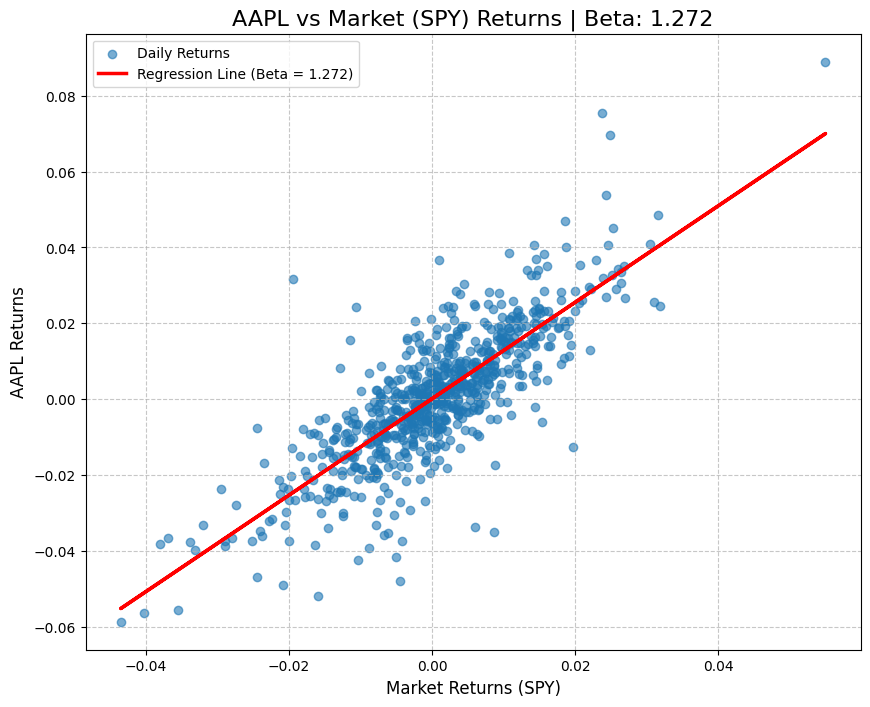

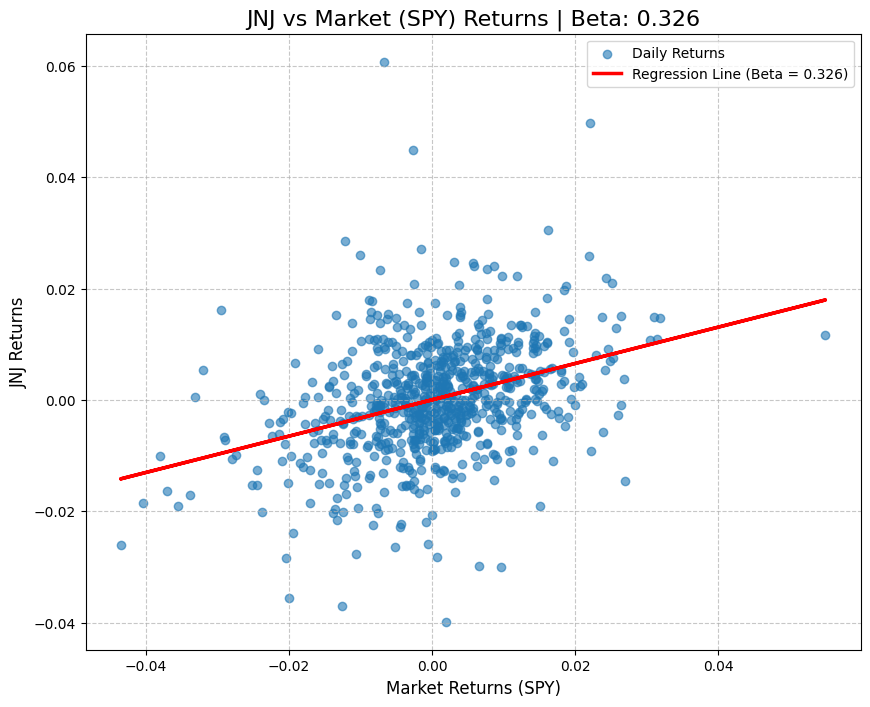

In [13]:
def plot_beta_relationship(stock_returns, market_returns, stock_name, beta):
    """
    Create scatter plot of stock vs market returns with regression line.
    """
    plt.figure(figsize=(10, 8))
    
    ######################
    # YOUR CODE HERE
    # Create scatter plot of stock returns vs market returns
    # Add regression line 
    # Include beta value in title
    # Add proper axis labels
    ######################

    df = pd.DataFrame({'stock': stock_returns, 'market': market_returns}).dropna()
    stock_returns = df['stock']
    market_returns = df['market']

    m, b = np.polyfit(market_returns, stock_returns, 1) 

    plt.scatter(market_returns, stock_returns, alpha=0.6, color='#1f77b4', label='Daily Returns')

    plt.plot(market_returns, m * market_returns + b, color='red', 
             linewidth=2.5, label=f'Regression Line (Beta = {beta:.3f})') 
    
    plt.title(f'{stock_name} vs Market (SPY) Returns | Beta: {beta:.3f}', fontsize=16)
    plt.xlabel('Market Returns (SPY)', fontsize=12)
    plt.ylabel(f'{stock_name} Returns', fontsize=12)
    
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Create plots for both stocks
plot_beta_relationship(simple_returns['AAPL'], simple_returns['SPY'], 'AAPL', aapl_beta)
plot_beta_relationship(simple_returns['JNJ'], simple_returns['SPY'], 'JNJ', jnj_beta)

### **Questions - Part 4**

10. Which stock is more sensitive to market movements? How do you know?
11. Based on beta, which stock would you expect to fall more in a market crash?
12. Do the betas make intuitive sense given what you know about these companies?

### **Your Answers - Part 4:**

10. AAPL is more senstive to market movement. Beta measures the sensitivity of the stock's returns to the market's returns. A beta higher than 1 means the stock is more volatile than the stock market, and a beta lower than 1 means the stock is less volatile to market movement. Since AAPL's beta is higher than JNJ's beta it is more sensitive to market movements.

11. I would expect AAPL to fall if the market crash, since its beta is higher, and thus has a higher tendency to follow market movement.

12. Yes, the betas make intuitive sense since AAPL is a technology, consumer based company, which is dependent on consumer confidence. If the market is doing well, and consumers have high confidence they are more likely to buy AAPL products, whereas with JNJ a large pharma company, the demand for their products aren't as dependent on economic prosperity. People will still medicine and hospitals will still operate even if the economy is doing bad, so their stock isn't as effected. But it is still a little effected because if the current situation is bad enough, people will start forgoing their medication or doctors visits, explaining why the beta is not negative.

---
## **Part 5: Time Series Analysis (15 points)**

### **Step 5.1: Cumulative Returns**
Calculate and plot cumulative returns to show total performance:

<>:20: SyntaxWarning: invalid escape sequence '\$'
<>:20: SyntaxWarning: invalid escape sequence '\$'
/var/folders/5b/9zzp_rgs4690tbp4cmzdk7bc0000gn/T/ipykernel_3429/3510889630.py:20: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel('Cumulative Growth of \$1 Investment', fontsize=12)


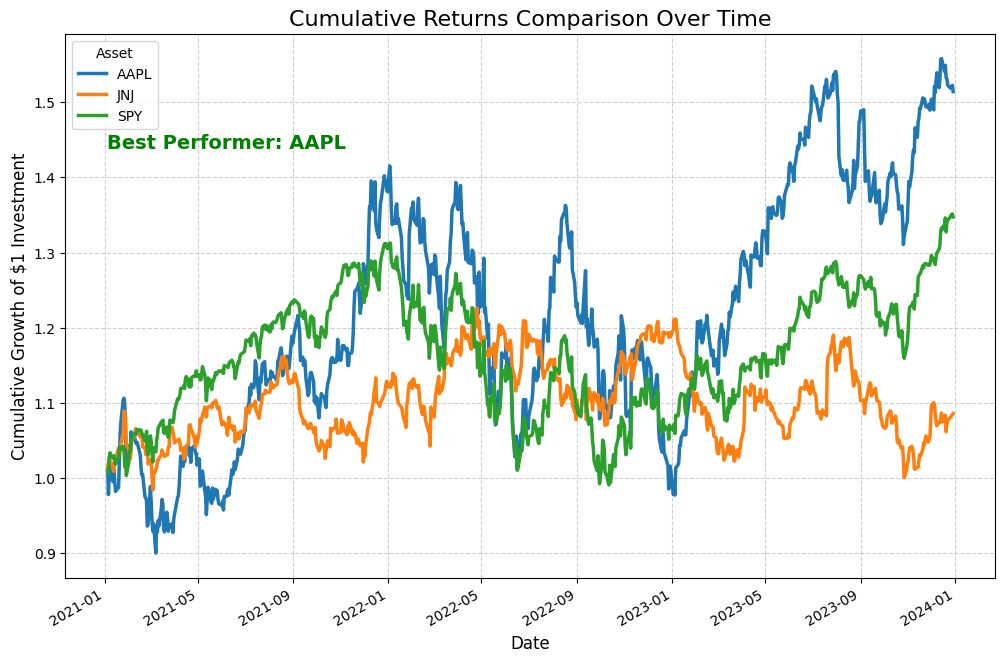

Total Returns over the period:
AAPL: 51.40%
JNJ: 8.57%
SPY: 34.74%


In [14]:
def analyze_cumulative_returns(returns_df):
    """
    Calculate and plot cumulative returns over time.
    """
    # Calculate cumulative returns (compound growth)
    cum_returns = (1 + returns_df).cumprod()
    
    # Plot cumulative returns
    plt.figure(figsize=(12, 8))
    ######################
    # YOUR CODE HERE
    # Plot cumulative returns for all three assets
    cum_returns.plot(ax=plt.gca(), linewidth=2.5)
    final_returns = cum_returns.iloc[-1]
    best_asset = final_returns.idxmax()
    
    # Add legend, title, and axis labels
    plt.title('Cumulative Returns Comparison Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Cumulative Growth of \$1 Investment', fontsize=12)
    # Show which investment performed best over time
    plt.text(
        x=cum_returns.index[0], 
        y=final_returns.max() * 0.95, # Place annotation near the top-left
        s=f'Best Performer: {best_asset}', 
        fontsize=14, 
        color='green',
        fontweight='bold'
    )
    plt.legend(title='Asset', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    ######################
    plt.show()
    
    return cum_returns

cumulative_returns = analyze_cumulative_returns(simple_returns)

# Calculate total returns over the period
total_returns = cumulative_returns.iloc[-1] - 1
print("Total Returns over the period:")
for asset in total_returns.index:
    print(f"{asset}: {total_returns[asset]:.2%}")

### **Step 5.2: Rolling Statistics**
Calculate rolling volatility to see how risk changes over time:

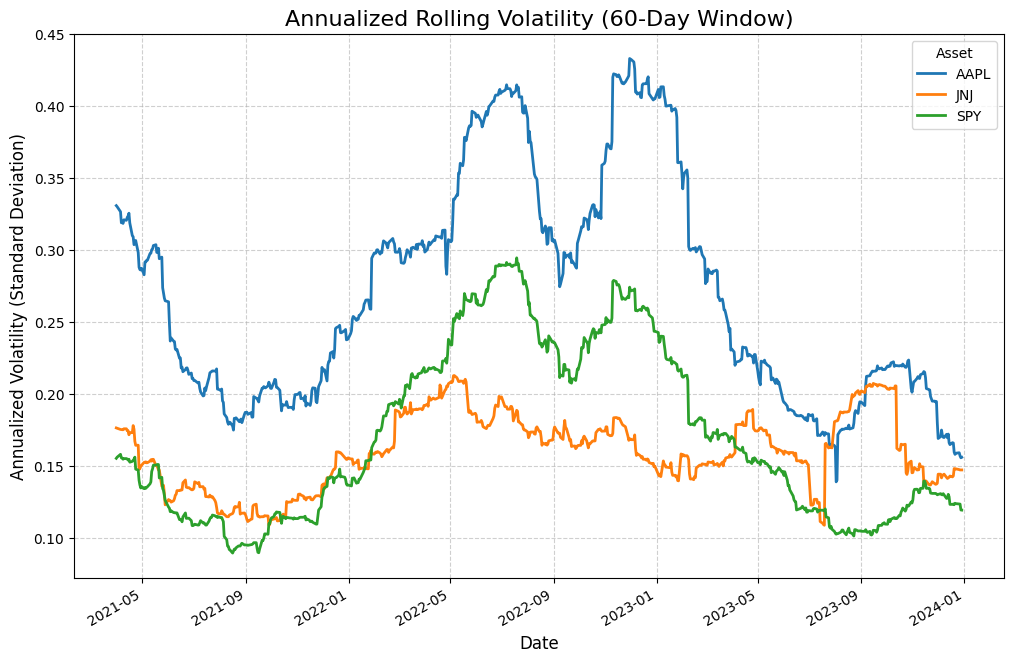

In [15]:
def plot_rolling_volatility(returns_df, window=60):
    """
    Plot 60-day rolling volatility for all assets.
    """
    # Calculate rolling standard deviation
    rolling_vol = returns_df.rolling(window=window).std() * np.sqrt(252)

    
    plt.figure(figsize=(12, 8))
    ######################
    # YOUR CODE HERE
    # Plot rolling volatility for all assets
    rolling_vol.plot(ax=plt.gca(), linewidth=2)
    # Add title indicating the window size
    plt.title(f'Annualized Rolling Volatility ({window}-Day Window)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Annualized Volatility (Standard Deviation)', fontsize=12)
    plt.legend(title='Asset', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    ######################
    plt.show()

plot_rolling_volatility(simple_returns, window=60)

### **Questions - Part 5**

13. Which asset had the best total return? Was this expected based on risk levels?
14. During which time periods was volatility highest? Can you guess why?
15. How does rolling volatility help us understand changing market conditions?

### **Your Answers - Part 5:**

13. AAPL had the best total return. That makes sense since it had the highest risk, and the highest sharpe ratio.

14. The periods of highest volatility were May 2022 - March 2023, this was likely due to some current events. Start of May, Russia was defaulting on their debt, sactions were placed on Russian businesses, which might have effected consumer confidence. Furthermore, the volatility was calculated with SPY, AAPL, and JNJ, during this time AAPL was accused of violating the EU compeition law, which must have servely effected their stock.

15. Rolling volatility helps us understand risk levels, since volatility is a marker for risk. Low volatility means market is complacent, steady growth, in a bull market, whereas high volatility indicated uncertantity and sharp price movement. When markets shift, it is marked with increased volatility, showing how the enviornment has changed, which could result in a change of strategy.

---
## **Part 6: Summary Analysis and Interpretation (10 points)**

Write a brief analysis (300-500 words) answering these questions:

### **Investment Summary**
Based on your analysis, write responses to these prompts:

1. **Risk-Return Profile**: Summarize the risk and return characteristics of each asset. Which offered the best risk-adjusted returns?

2. **Diversification Benefits**: Explain whether combining AAPL and JNJ in a portfolio provided diversification benefits. Use specific numbers from your analysis.

3. **Market Sensitivity**: Compare how AAPL and JNJ respond to market movements using your beta analysis. What does this mean for an investor?

4. **Time-Varying Risk**: Describe how volatility changed over your sample period. What events might explain these changes?

5. **Investment Recommendation**: If you had to choose between investing in individual stocks or the diversified portfolio, what would you recommend and why?

### **My Analysis**

### **My Analysis**

1. AAPL offered the highest annualized return (17.76%) but also the highest annualized volatility (0.2780). Its daily mean return was 0.0007. JNJ had the lowest annualized return (4.06%) and the lowest annualized volatility (0.1619). Its daily mean return was 0.0002. Finally, SPY fell in the middle with an annualized return of 11.54% and volatility of 0.1760. Its daily mean return was 0.0005. Knowing all these stats, the best risk-adjusted return was offered by AAPL, corroborated by its sharpe ratio of 0.5668 (the highest of all three equitites). This means AAPL provides the greatest return per unit of risk.

2. Combining AAPL and JNJ provide diversification benefits, which only happen when the equitites in question are not perfectly correlated, reducing total portfolio volatility. The correlation between AAPL and JNJ is 0.2396. Since this correlation is significantly less than +1.0, the portfolio's overall volatility will be lower than the weighted average of the individual volatilities. A correlation of 0.2396 indicates a weak positive relationship, which is beneficial for reducing portfolio risk. 

3. Beta measures an assest's sensitvity to market movement. AAPL Beta is 1.272, which means AAPL is an aggressive stock that is more sensitive to market movements than the average stock. A 1% increase in the market return is associated with a 1.272% increase in AAPL's return. JNJ Beta is 0.326 which means JNJ is a defensive stock that is less sensitive to market movements than the average stock. A 1% increase in the market return is associated with only a 0.326% increase in JNJ's return. For an investor this analysis would provide insight on how they pick stocks for their portfolio. If an investor is seeking higher growth and is willing to take on more systemic risk they would find AAPL attractive. Whereas if an investor seeking stability and lower systemic risk would prefer JNJ. JNJ's returns are less affected by broad market swings, making it a good "buffer" stock for a diversified portfolio, especially during market corrections.

4. Looking at the rolling volatility chart, the period of high volatility was May 2022 - March 2023. Here the volatility rose above .35, and the volatility itself was somewhat volatile, which could be intersting for people trading volatility swaps or other derivatives which look at volatility on volatility. But, this was likely due to some current events. Start of May, Russia was defaulting on their debt, sactions were placed on Russian businesses, which might have effected consumer confidence. Furthermore, the volatility was calculated with SPY, AAPL, and JNJ, during this time AAPL was accused of violating the EU compeition law, which must have servely effected their stock.


5. I would recommend a diversifed portfolio over investing in an individual stock. Since we know the sharpe ratios of AAPL (0.504), JNJ (0.5668), and SPY (0.1274), depending on the risk tolerance and growth goals of the client, AAPL would be a nice pick for a decent weighting of the portfolio because it has the highest sharpe ratio. However, AAPL also had the highest beta, so the porfolio should account for this, with a similar weighting of JNJ, to ensure the porfolio is hedged on beta. If the stock market is not doing as well, JNJ won't be as affected as AAPL would be. Furthermore, since AAPL and JNJ have a lower correlation, the portfolio would have diversification benefits, reducing the overall risk. SPY would offer board market exposure, and decent diversitifcation in itself since it is an ETF, so it would should also have a decent position in the portfolio. I would say 35% JNJ, 25% AAPL, and 40% SPY.


---
## **Bonus Section: Probability Application (5 extra points)**

Apply probability concepts from Week 1 slides:

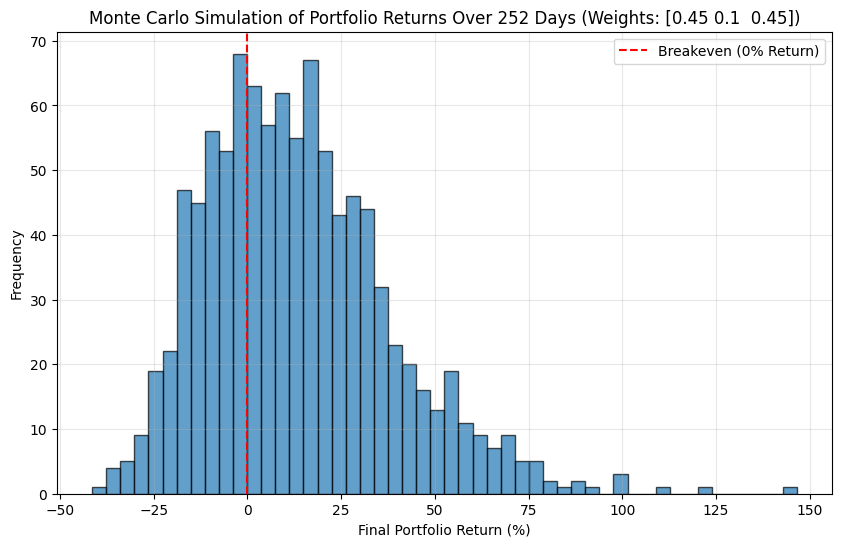


--- Simulation Summary ---
Number of Simulations: 1000
Time Horizon: 252 trading days (approx. 1 year)
Daily Mean Return (mu_d): 0.0005
Daily Standard Deviation (sigma_d): 0.0126
------------------------------
Mean Final Return: 13.35%
Median Final Return: 10.34%
95% Confidence Interval (VaR): [-25.24%, 69.23%]

Probability of Losing Money (Return < 0%): 33.20%


In [16]:
def simulate_portfolio_outcomes(returns_df, num_simulations=1000, time_horizon=252):
    """
    Use Monte Carlo simulation to project potential portfolio outcomes.
    Assume returns follow a normal distribution.
    Also assume the stock price follows a geometric Brownian motion.
    """
    weights = np.array([0.45, 0.10, 0.45])

    returns = returns_df.dropna().copy()

    returns['Portfolio_Returns'] = returns.dot(weights)

    mu_d = returns['Portfolio_Returns'].mean()
    sigma_d = returns['Portfolio_Returns'].std()

    final_values = np.zeros(num_simulations)

    P0 = 1.0

    drift = mu_d - 0.5 * sigma_d**2
    volatility_term = sigma_d

    for i in range(num_simulations):
        # Generate T random draws from a standard normal distribution (Z)
        daily_shocks = np.random.normal(0, 1, time_horizon)
        
        # Calculate daily return factors for the path (Geometric Brownian Motion)
        daily_returns_factor = np.exp(drift + volatility_term * daily_shocks)
        
        # Calculate the cumulative product of daily returns to get the final value
        final_value = P0 * np.prod(daily_returns_factor)
        
        # Store the result
        final_values[i] = final_value

    final_returns_percent = (final_values - 1.0) * 100
    
    plt.figure(figsize=(10, 6))
    plt.hist(final_returns_percent, bins=50, edgecolor='k', alpha=0.7)
    plt.title(f'Monte Carlo Simulation of Portfolio Returns Over {time_horizon} Days (Weights: {weights})')
    plt.xlabel('Final Portfolio Return (%)')
    plt.ylabel('Frequency')
    plt.axvline(x=0, color='r', linestyle='--', label='Breakeven (0% Return)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    probability_of_loss = np.sum(final_values < P0) / num_simulations
    
    # Print Summary Statistics
    print("\n--- Simulation Summary ---")
    print(f"Number of Simulations: {num_simulations}")
    print(f"Time Horizon: {time_horizon} trading days (approx. 1 year)")
    print(f"Daily Mean Return (mu_d): {mu_d:.4f}")
    print(f"Daily Standard Deviation (sigma_d): {sigma_d:.4f}")
    print("-" * 30)
    print(f"Mean Final Return: {np.mean(final_returns_percent):.2f}%")
    print(f"Median Final Return: {np.median(final_returns_percent):.2f}%")
    print(f"95% Confidence Interval (VaR): [{np.percentile(final_returns_percent, 2.5):.2f}%, {np.percentile(final_returns_percent, 97.5):.2f}%]")
    print(f"\nProbability of Losing Money (Return < 0%): {probability_of_loss * 100:.2f}%")
    ######################

# Run simulation
simulate_portfolio_outcomes(simple_returns)

---
## **Submission Checklist**

Before submitting, make sure you have:

- [ ] Filled in your name and GT username at the top
- [ ] Completed all code sections with working implementations
- [ ] Answered all 15 numbered questions in the markdown cells
- [ ] Written the 300-500 word summary analysis
- [ ] All code cells run without errors
- [ ] All plots display correctly
- [ ] Saved the notebook as `quant_intro_project_[GTUsername].ipynb`
- [ ] Exported a PDF version showing all outputs
- [ ] Push your code to your personal Git repo

**Good luck!**